In [1]:
# package import

import sys

lib_path = "../lib/algorithms"
sys.path.append(lib_path)

lib_path = "../lib/arms"
sys.path.append(lib_path)

lib_path = "../lib/simulation"
sys.path.append(lib_path)

import epsilon_greedy
from epsilon_greedy import EpsilonGreedy

import bernoulli
from bernoulli import BernoulliArm

import simulation
from simulation import test_algorithm

import random
import time

In [2]:
# declaration of some utility functions
def ind_max(x):
    m = max(x)
    return x.index(m)

In [3]:
random.seed(1)
#random.seed(time.time())

means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms =  list(map(lambda mu: BernoulliArm(mu), means))
best_arm = ind_max(means)
print("Best arm is " + str(best_arm))

simulations = []
epsilons = []
times = []
chosen_arms = []
rewards = []
cumulative_rewards = []
probability_of_select_bestarms = []

display_process = False

n_sim = 5000
horizon = 500

for sim in range(n_sim):
    for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
        algo = EpsilonGreedy(epsilon, 0, 0)
        algo.initialize(n_arms)
        results = test_algorithm(algo, arms, horizon)

        probability_of_select_bestarm = 0.0
        n_select_best = 0

        for i in range(len(results)):
            t, chosen_arm, reward, cumulative_reward = results[i]
            if chosen_arm == best_arm:
                n_select_best += 1
            probability_of_select_bestarm = n_select_best / float(t)

            simulations.append(sim)
            epsilons.append(epsilon)
            times.append(t)
            chosen_arms.append(chosen_arm)
            rewards.append(reward)
            cumulative_rewards.append(cumulative_reward)
            probability_of_select_bestarms.append(probability_of_select_bestarm)

            if display_process:
                print("simulation", sim,
                      "epsilon", epsilon, 
                      "times", t, 
                      "chosen arm", chosen_arm, 
                      "reward", reward, 
                      "cumulative_reward", cumulative_reward, 
                      "probability_of_select_bestarm", probability_of_select_bestarm)


Best arm is 2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'simulation': simulations,
                   'epsilon': epsilons,
                   'times': times,
                   'chosen_arm': chosen_arms,
                   'reward': rewards,
                   'cumulative_reward': cumulative_rewards,
                   'probability_of_select_bestarm': probability_of_select_bestarms})

df.head(5)

,chosen_arm,cumulative_reward,epsilon,probability_of_select_bestarm,reward,simulation,times
0,0,0.0,0.1,0.0,0.0,0,1
1,0,0.0,0.1,0.0,0.0,0,2
2,0,0.0,0.1,0.0,0.0,0,3
3,0,0.0,0.1,0.0,0.0,0,4
4,0,0.0,0.1,0.0,0.0,0,5


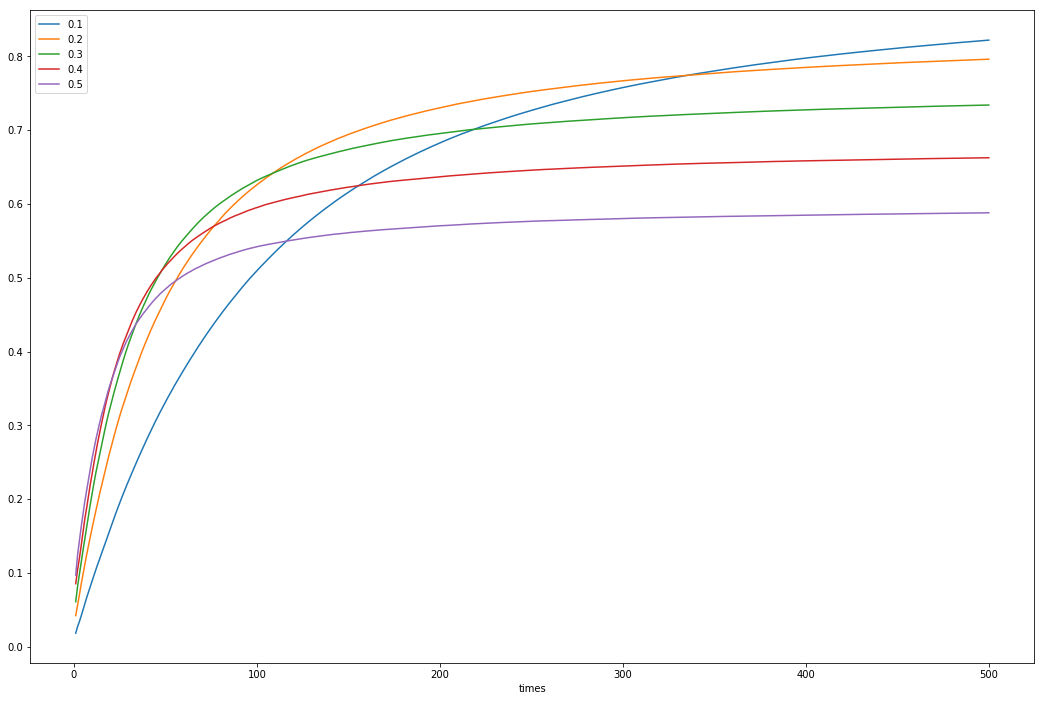

In [5]:
# probability of select best arm by epsilons over times

prob_df = df.groupby(['epsilon', 'times']).agg({'probability_of_select_bestarm': np.mean}).reset_index()

fig, ax = plt.subplots(figsize=(18, 12))

for key, grp in prob_df.groupby(['epsilon']):
    ax = grp.plot(ax=ax, kind='line', x='times', y='probability_of_select_bestarm', label=key)

plt.legend(loc='best')
plt.show()

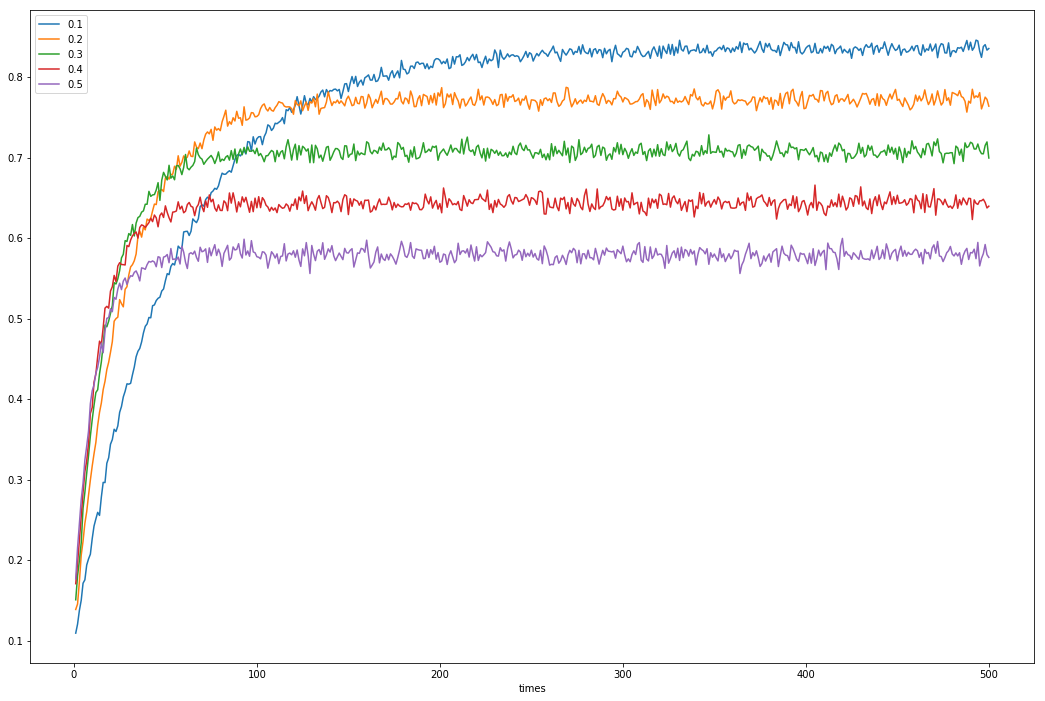

In [6]:
# reward by eplisons over times

reward_df = df.groupby(['epsilon', 'times']).agg({'reward': np.mean}).reset_index()

fig, ax = plt.subplots(figsize=(18, 12))

for key, grp in reward_df.groupby(['epsilon']):
    ax = grp.plot(ax=ax, kind='line', x='times', y='reward', label=key)

plt.legend(loc='best')
plt.show()

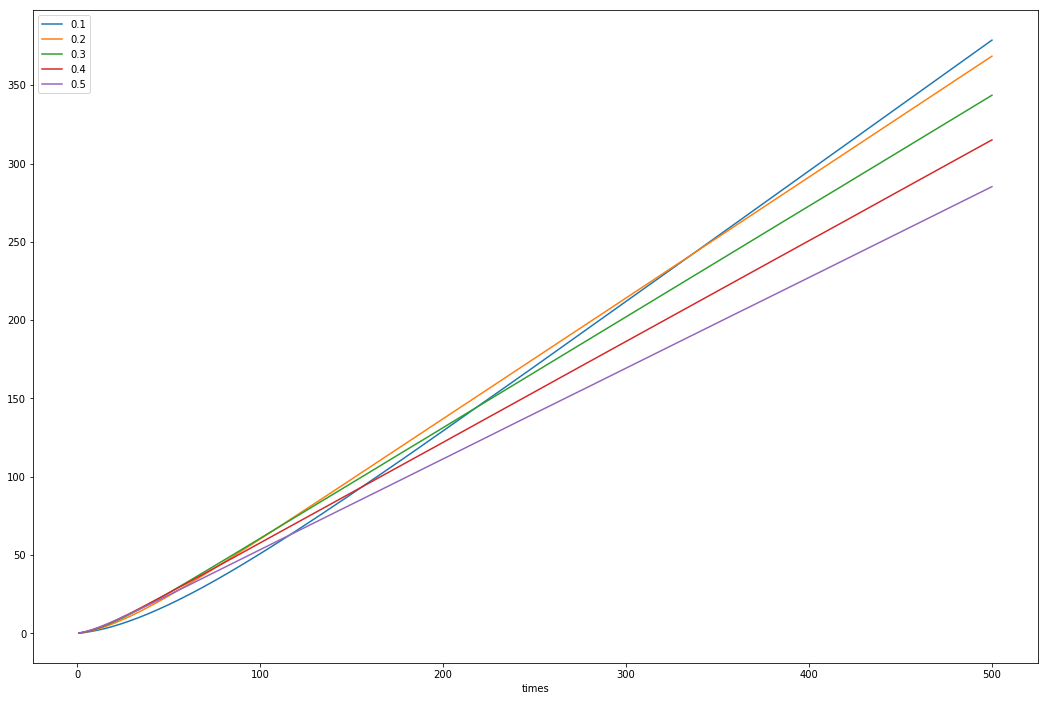

In [7]:
# cumulative reward by eplisons over times

cumu_reward_df = df.groupby(['epsilon', 'times']).agg({'cumulative_reward': np.mean}).reset_index()

fig, ax = plt.subplots(figsize=(18, 12))

for key, grp in cumu_reward_df.groupby(['epsilon']):
    ax = grp.plot(ax=ax, kind='line', x='times', y='cumulative_reward', label=key)

plt.legend(loc='best')
plt.show()